In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import ast
from datasets import load_dataset

In [2]:
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

In [3]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [4]:
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [6]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

<Axes: >

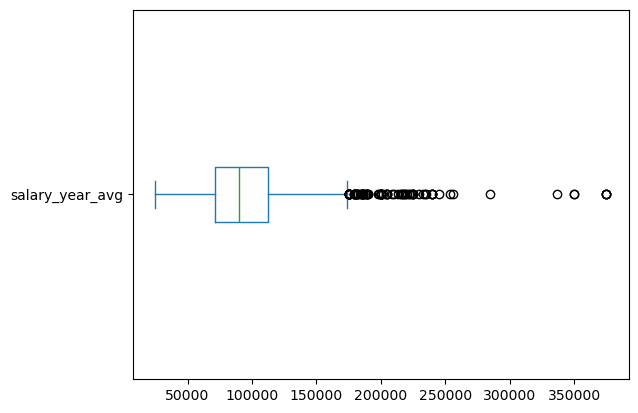

In [8]:
df_DA_US['salary_year_avg'].plot(kind = 'box', vert = False)

/var/folders/10/q7cz89bx5qzbm22tqw5z4nvc0000gn/T/ipykernel_8553/1788610313.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = job_titles, vert = False)


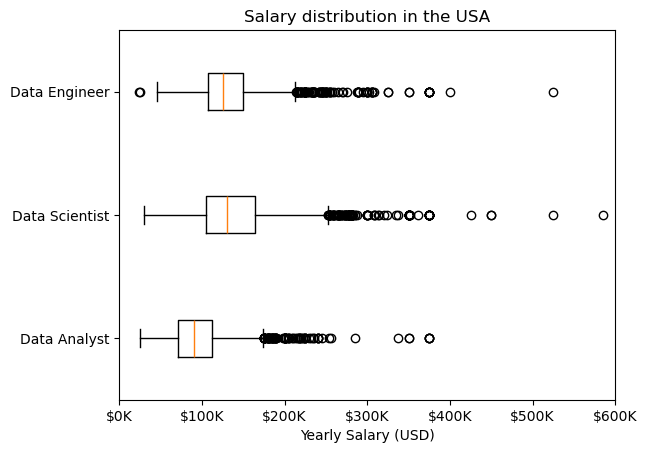

In [14]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels = job_titles, vert = False)
plt.title('Salary distribution in the USA')
plt.xlabel('Yearly Salary (USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()